# Plot flight data

Do imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ae483tools import *

#### Load data



Load data from a flight in which the drone took off, moved in a square, and landed.

In [2]:
raw_data_drone, raw_data_mocap = load_hardware_data('first_flight.json')

You only collected, and will only be looking at, data from the drone in this case. You should find that `raw_data_mocap` is an empty dictionary. Let's check:

In [3]:
print(raw_data_mocap)
assert(raw_data_mocap == {})

{}


#### Resample data

Flight data are all collected at different times. Analysis is more convenient if we first *resample* the flight data so it is as if these data were all collected at the same times. In particular, the following function will resample the flight data at 100 Hz, using linear interpolation. It returns the resampled flight data in the form of a dictionary, where each item is a numpy array.

In [4]:
data_drone = resample_data_drone(
    raw_data_drone,   # <-- dictionary with data to resample
    t_min_offset=0.,  # <-- number of seconds to cut off the start (must be non-negative)
    t_max_offset=0.,  # <-- number of seconds to cut off the end (must be non-negative)
)

Extract what we want to plot from the resampled data.

In [5]:
# Time in seconds
t = data_drone['time']

# Components of position in meters
x_drone = data_drone['stateEstimate.x']
y_drone = data_drone['stateEstimate.y']
z_drone = data_drone['stateEstimate.z']

# ZYX Euler Angles (psi is yaw, theta is pitch, phi is roll)
# in radians, to represent orientation
psi_drone = np.deg2rad(data_drone['stateEstimate.yaw'])         # <-- THINK: why call np.deg2rad?
theta_drone = - np.deg2rad(data_drone['stateEstimate.pitch'])   # <-- THINK: why the change in sign?
phi_drone = np.deg2rad(data_drone['stateEstimate.roll'])

#### Plot data

Plot $x, y$ data.

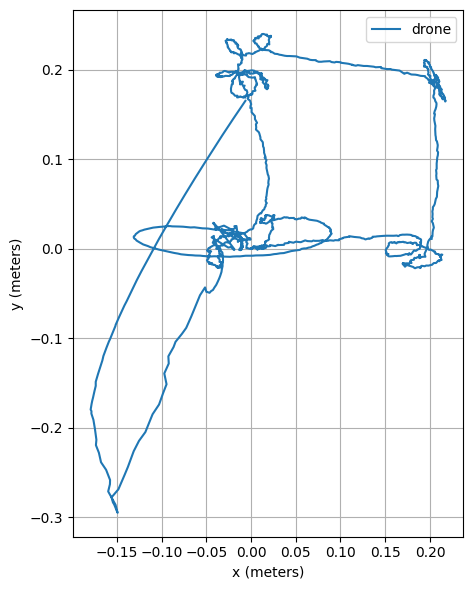

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
ax.plot(x_drone, y_drone, label='drone')
ax.legend()
ax.grid()
ax.set_aspect('equal')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
plt.show()

Plot all data.

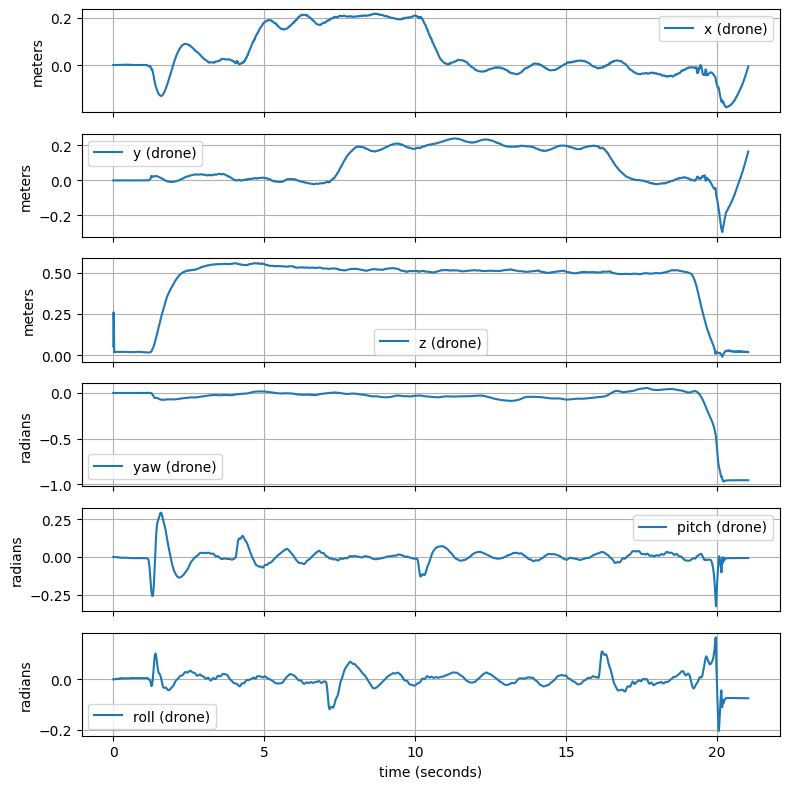

In [7]:
fig, (ax_x, ax_y, ax_z, ax_psi, ax_theta, ax_phi) = plt.subplots(
    6, 1,
    figsize=(8, 8),
    tight_layout=True,
    sharex=True,
)

ax_x.plot(t, x_drone, label='x (drone)')
ax_x.legend()
ax_x.grid()
ax_x.set_ylabel('meters')

ax_y.plot(t, y_drone, label='y (drone)')
ax_y.legend()
ax_y.grid()
ax_y.set_ylabel('meters')

ax_z.plot(t, z_drone, label='z (drone)')
ax_z.legend()
ax_z.grid()
ax_z.set_ylabel('meters')

ax_psi.plot(t, psi_drone, label='yaw (drone)')
ax_psi.legend()
ax_psi.grid()
ax_psi.set_ylabel('radians')

ax_theta.plot(t, theta_drone, label='pitch (drone)')
ax_theta.legend()
ax_theta.grid()
ax_theta.set_ylabel('radians')

ax_phi.plot(t, phi_drone, label='roll (drone)')
ax_phi.legend()
ax_phi.grid()
ax_phi.set_ylabel('radians')
ax_phi.set_xlabel('time (seconds)')

plt.show()